In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-clips/youtube_clips.csv


In [2]:
df = pd.read_csv("/kaggle/input/youtube-clips/youtube_clips.csv", sep = "\t")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361
...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


In [5]:
df.isna().sum().sort_values(ascending = False)

commentators_uniq       6810
comments_obscene_cnt    6810
dislikeCount             274
likeCount                274
commentCount             210
viewCount                  1
title                      0
music_style                0
performer                  0
video_age                  0
dtype: int64

<Axes: >

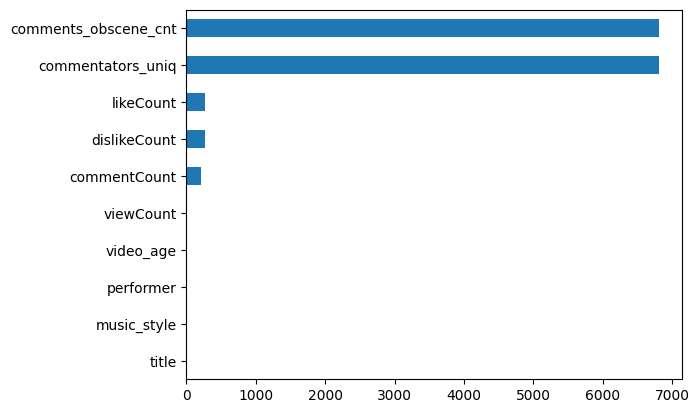

In [6]:
df.isna().sum().sort_values(ascending = True).plot.barh()

In [7]:
for col in df:
    if df[col].isna().sum() > 0:
        print(f"'{col}' has {df[col].count()} values, missing are {df[col].isna().sum()}, which is {(df[col].isna().sum() / df[col].count() * 100):.2f}%.")

'commentCount' has 18914 values, missing are 210, which is 1.11%.
'dislikeCount' has 18850 values, missing are 274, which is 1.45%.
'likeCount' has 18850 values, missing are 274, which is 1.45%.
'viewCount' has 19123 values, missing are 1, which is 0.01%.
'commentators_uniq' has 12314 values, missing are 6810, which is 55.30%.
'comments_obscene_cnt' has 12314 values, missing are 6810, which is 55.30%.


My approach to removing nans:
1) I figure if nans provides an information, like if nans mean a user is a fraud.
2) I figure if nans are in place of valid values or not and are in fact real nans, like nan for a number of votes if a user is a 10-year-old.
3) If nan is in place of valid value and presents a mistake, I replace them:
  - if data is normally distributed (bell curve), I use mean.
  - if data is skewed, mean is useless. I use median.

In [8]:
columns_with_nans = [col for col in df if df[col].isna().sum() > 0]
columns_with_nans

['commentCount',
 'dislikeCount',
 'likeCount',
 'viewCount',
 'commentators_uniq',
 'comments_obscene_cnt']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [10]:
df_clean = df[columns_with_nans].dropna()
df_clean

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt
0,34.0,43.0,1402.0,214301.0,24.0,0.0
2,26.0,10.0,269.0,40327.0,23.0,0.0
3,12.0,7.0,163.0,11907.0,11.0,0.0
4,46.0,19.0,597.0,91483.0,33.0,1.0
5,7.0,7.0,87.0,9217.0,6.0,0.0
...,...,...,...,...,...,...
19116,41.0,142.0,914.0,308721.0,22.0,0.0
19117,2881.0,4108.0,58429.0,9577433.0,1696.0,5.0
19120,94.0,431.0,1837.0,391836.0,37.0,1.0
19121,4872.0,15494.0,30603.0,1187340.0,1788.0,352.0


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12116 entries, 0 to 19122
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   commentCount          12116 non-null  float64
 1   dislikeCount          12116 non-null  float64
 2   likeCount             12116 non-null  float64
 3   viewCount             12116 non-null  float64
 4   commentators_uniq     12116 non-null  float64
 5   comments_obscene_cnt  12116 non-null  float64
dtypes: float64(6)
memory usage: 662.6 KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

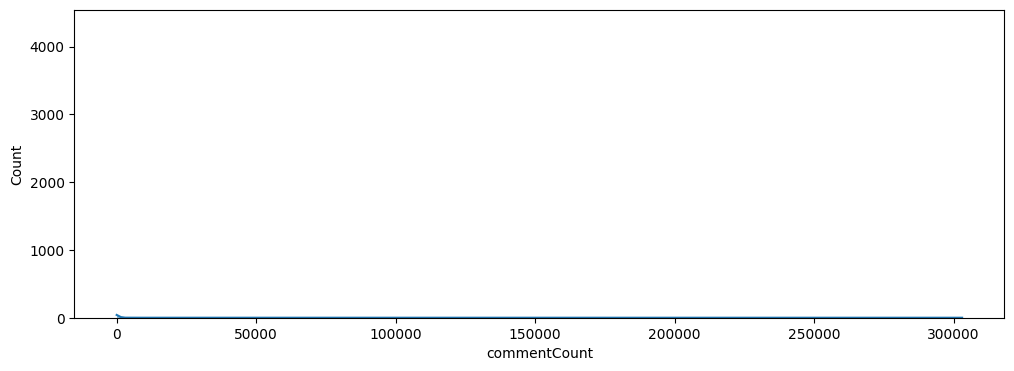

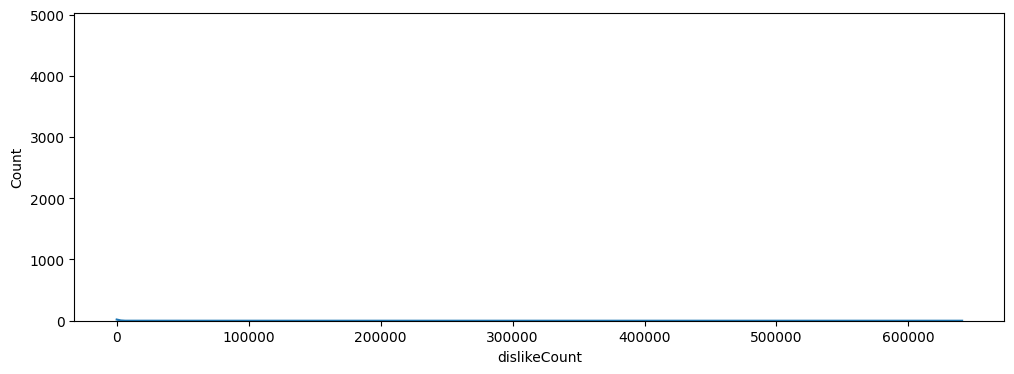

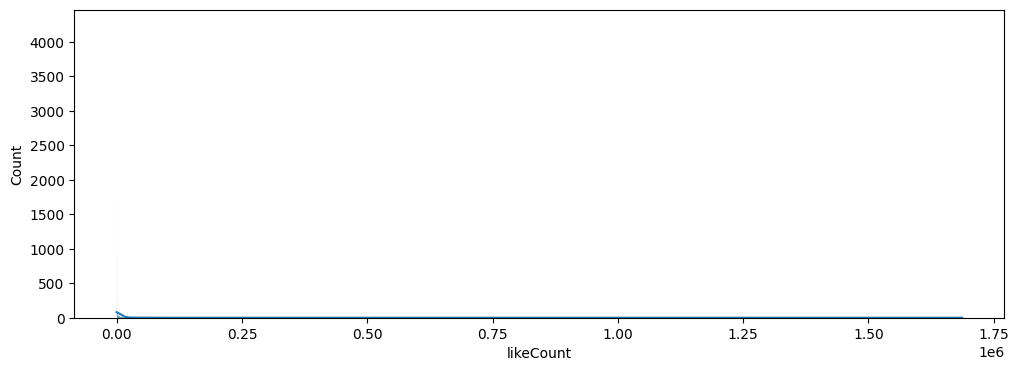

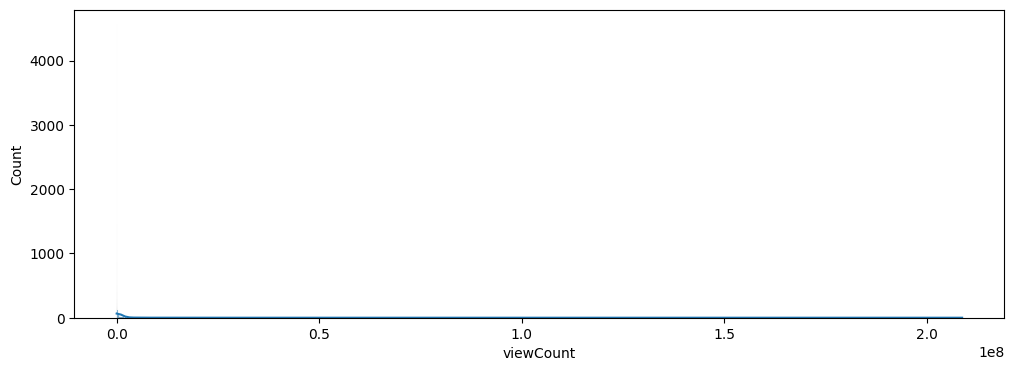

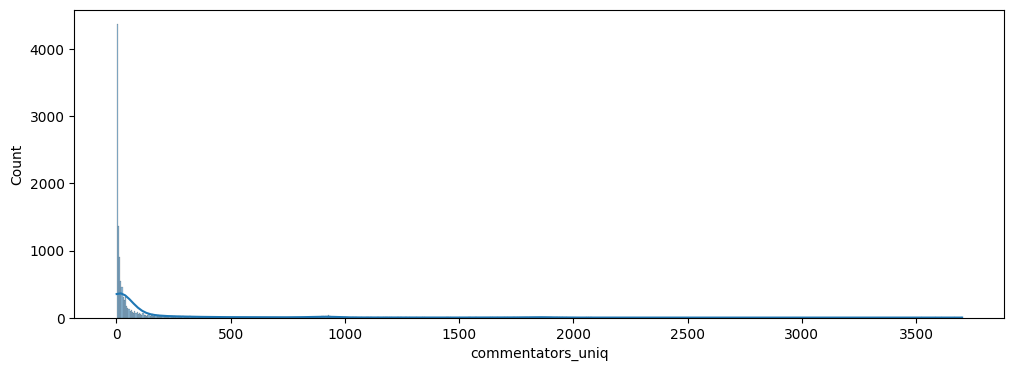

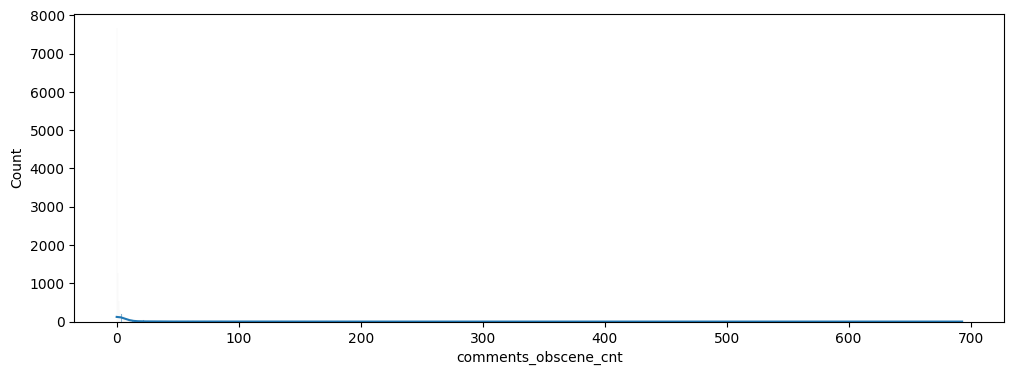

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for c in df_clean[['commentCount', 'dislikeCount', 'likeCount', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt']]:
    plt.figure(figsize = (12, 4))
    sns.histplot(df_clean[c], kde = True, stat = 'count')

We see that "commentators_uniq" is visualized as right-tailed, but other columns follow the common for social media metrics Power-Law Distribution: some videos get a lot of views, but most get a few, which results in a straight line.

I'll run the check for skewness and kurtosis to confirm that data is skewed and median is better to replace nans.

In [13]:
res = []
for c in df_clean[['commentCount', 'dislikeCount', 'likeCount', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt']]:
    res.append({'Columns': c,
               'Skewness': df_clean[c].skew(),
               'Kurtosis': df_clean[c].kurtosis()})
skewed_test = pd.DataFrame(res).set_index('Columns')
skewed_test

,Skewness,Kurtosis
Columns,,
commentCount,33.420412,1564.152550
dislikeCount,31.789153,1363.979351
likeCount,14.189065,305.556387
viewCount,13.963421,259.504602
commentators_uniq,4.058420,20.674286
comments_obscene_cnt,7.953593,82.206905


Data is normally distributed when Skewness and Kurtosis are close to 0.
This data is very sckewed.
I replace nans with median.

In [14]:
#replace nans with median:
for col in columns_with_nans:
    df[col] = df[col].fillna(df[col].median())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          19124 non-null  float64
 2   dislikeCount          19124 non-null  float64
 3   likeCount             19124 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19124 non-null  float64
 7   commentators_uniq     19124 non-null  float64
 8   comments_obscene_cnt  19124 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [16]:
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361
...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997


# Duplicates

In [17]:
#Duplicates in dataset:
for col in df:
    print(f"{col} has {df[col].duplicated().sum()} duplicates.")

title has 1095 duplicates.
commentCount has 17517 duplicates.
dislikeCount has 17369 duplicates.
likeCount has 14841 duplicates.
music_style has 19117 duplicates.
performer has 19013 duplicates.
viewCount has 4576 duplicates.
commentators_uniq has 18091 duplicates.
comments_obscene_cnt has 18863 duplicates.
video_age has 15832 duplicates.


Almost all columns in this dataset are expected to have identical values. So most of the duplicates are valid.

The columns "music_style" and "performer" may have duplicates, but it's impossible to find it out from this simple check.

It's only possible to know if "music_style" and "performer" have duplicates if we'll see a glaring error, like butirka does classic.

About the column "title". From what I understand about this dataset, "title" is supposed to be unique. So any duplicate in "title" is a real duplicate. And we have 1095 of them.

I create a new column "title_clean" which I will analyze

In [18]:
import re
def clean_title(text):
    text = re.sub(r'[^a-zA-zа-яА-я0-9_\s]', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['title_clean'] = df['title'].apply(clean_title)
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,2маши свободные линии
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217,alarm сергей лазарев sergey lazarev
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,earth song sergey lazarev dedicated to michael...
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,earth song премия муз тв 2010 live
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,fake сергей лазарев sergey
...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44,мы расстаемся бутырка new2019
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2 часа моцарт для младенцев колыбельная класси...
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,17
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,mumiy troll happy new year baby fan s video


In [19]:
df['title_clean'].nunique()

17821

Curious finding: in the 'title_clean' we have 19124 rows but only 17821 unique values, which means 1301 duplicates.

Let's see how this duplicates square with other values like performer, music_style.

In [20]:
#Let's see how many titles each performer has:
res = df.groupby('performer')['title_clean'].count().sort_values(ascending = False)
print(res.to_string())

performer
николаев                                      566
валерия                                       525
михайлов                                      516
ваенга                                        503
михаил_круг                                   487
киркоров                                      475
лепс                                          472
ленинград                                     461
gazgolder                                     443
несчастный_случай                             423
бутырка                                       419
нюша                                          415
арбенина                                      412
мумий_тролль                                  405
пугачёва                                      405
гражданская_оборона                           402
astudio                                       352
шуфутинский                                   349
тимати                                        347
би_2                                    

We immediately see the problem: agutin can't have three titles. A lot of titles here actually belong to agutin.

In [21]:
#Let's see how many music_styles each performer has
#I could do it with groupby, but I will only see the result. Instead, I want to see the actual data.
#So I will use crosstab:
r = pd.crosstab(df.performer, df.music_style, margins = True)
print(r.to_string())

music_style                                 classic  estrada  indi  popsa   rap  rock  shanson    All
performer                                                                                            
2маши                                             0        0     0    126     0     0        0    126
astudio                                           0        0     0    352     0     0        0    352
classical_channel                               298        0     0      0     0     0        0    298
cбпч                                              0        0   108      0     0     0        0    108
face                                              0        0     0      0    25     0        0     25
feduk                                             0        0     0      0    89     0        0     89
gazgolder                                         0        0     0      0   443     0        0    443
ic3peak                                           0        0    37      0     0   

We see that each performer has only one music_style. This excludes mistakes like butirka doing classic.

In [22]:
#In this code, I try to see if some titles belong to agutin:
agutin_mark = ['агутин', 'хэй лала лэй', 'остров', 'я буду всегда с тобой', 'на сереневой луне', 'как не думать о тебе', 'две дороги два пути']
mark = '|'.join(agutin_mark)
result = df[df['title_clean'].str.contains(mark, case = False, na = False)]
result

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean
99,"""Остров Юрий""",1.0,0.0,11.0,estrada,николаев,611.0,1.0,0.0,1326,остров юрий
199,"#2Маши ""с приветом с чудо острова Koh Phangan""",0.0,2.0,112.0,popsa,2маши,8025.0,13.0,0.0,1144,2маши с приветом с чудо острова koh phangan
638,A'Studio и The Jigits – «Прощай» (Новое исполн...,217.0,247.0,5000.0,popsa,astudio,881606.0,127.0,2.0,177,a studio и the jigits прощай новое исполнение ...
678,A'Studio репетируют концерт памяти Батыра (Гур...,13.0,3.0,124.0,popsa,astudio,8958.0,9.0,1.0,1010,a studio репетируют концерт памяти батыра гурц...
742,A'Studio – «Половина сердца» (Творческий вечер...,12.0,31.0,209.0,popsa,astudio,106279.0,8.0,0.0,1491,a studio половина сердца творческий вечер леон...
1857,Kostrovaya (Костровая),0.0,0.0,3.0,shanson,шуфутинский,951.0,13.0,0.0,1632,kostrovaya костровая
2809,"NYUSHA - Остров, Субботний вечер, 08.10.16",59.0,17.0,551.0,popsa,нюша,37838.0,36.0,0.0,887,nyusha остров субботний вечер 08 10 16
4904,"Анжелика Варум и Леонид Агутин ""Прости, поверь""",7.0,34.0,516.0,estrada,николаев,277462.0,5.0,0.0,3165,анжелика варум и леонид агутин прости поверь
6992,Воровайки - Бабий остров (Audio),0.0,1.0,36.0,shanson,воровайки,20412.0,13.0,0.0,2511,воровайки бабий остров audio
9321,Женский остров,0.0,0.0,1.0,shanson,шуфутинский,205.0,13.0,0.0,1482,женскии остров


From what I observe, indexes 4904 and 11522 indeed contain agutin titles, but performer is nikolaev.

# DataFrame Optimization

In [23]:
#show ram usage:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          19124 non-null  float64
 2   dislikeCount          19124 non-null  float64
 3   likeCount             19124 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19124 non-null  float64
 7   commentators_uniq     19124 non-null  float64
 8   comments_obscene_cnt  19124 non-null  float64
 9   video_age             19124 non-null  int64  
 10  title_clean           19124 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 10.4 MB


RAM usage is 9.2 MB
All numerical columns could be transformed to int32, because there no astronomical numbers here and all numbers are whole.
All string columns are currently object, but could be category to save memory.
"title" should be stripped of all non-alphabetical characters, but that has already been done.

In [24]:
#transform columns with float64 to int32 and columns with object to category, excluding title
ndf = df.copy().drop(columns = 'title')
ndf

,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean
0,34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,2маши свободные линии
1,5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217,alarm сергей лазарев sergey lazarev
2,26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,earth song sergey lazarev dedicated to michael...
3,12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,earth song премия муз тв 2010 live
4,46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,fake сергей лазарев sergey
...,...,...,...,...,...,...,...,...,...,...
19119,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44,мы расстаемся бутырка new2019
19120,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2 часа моцарт для младенцев колыбельная класси...
19121,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,17
19122,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,mumiy troll happy new year baby fan s video


In [25]:
for col in ndf:
    if ndf[col].dtype == 'float64' or ndf[col].dtype == 'int64':
        ndf[col] = ndf[col].astype('int32')
    elif ndf[col].dtype == 'object':
        ndf[col] = ndf[col].astype('category')

In [26]:
ndf.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   commentCount          19124 non-null  int32   
 1   dislikeCount          19124 non-null  int32   
 2   likeCount             19124 non-null  int32   
 3   music_style           19124 non-null  category
 4   performer             19124 non-null  category
 5   viewCount             19124 non-null  int32   
 6   commentators_uniq     19124 non-null  int32   
 7   comments_obscene_cnt  19124 non-null  int32   
 8   video_age             19124 non-null  int32   
 9   title_clean           19124 non-null  category
dtypes: category(3), int32(7)
memory usage: 4.4 MB


The optimization is successful, and RAM usage is lowered by 47%, from 9.2MB to 4.4MB.
Let's take a look at our ndf, just in case:

In [27]:
ndf

,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean
0,34,43,1402,popsa,2маши,214301,24,0,1141,2маши свободные линии
1,5,690,10532,popsa,лазарев,2221419,13,0,3217,alarm сергей лазарев sergey lazarev
2,26,10,269,popsa,лазарев,40327,23,0,3546,earth song sergey lazarev dedicated to michael...
3,12,7,163,popsa,лазарев,11907,11,0,3189,earth song премия муз тв 2010 live
4,46,19,597,popsa,лазарев,91483,33,1,3361,fake сергей лазарев sergey
...,...,...,...,...,...,...,...,...,...,...
19119,2,0,11,shanson,бутырка,1107,13,0,44,мы расстаемся бутырка new2019
19120,94,431,1837,classic,classical_channel,391836,37,1,239,2 часа моцарт для младенцев колыбельная класси...
19121,4872,15494,30603,rap,элджей,1187340,1788,352,339,17
19122,59,10,260,rock,мумий_тролль,10147,19,0,997,mumiy troll happy new year baby fan s video


In [28]:
dtype_schema = {}
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        dtype_schema[col] = 'int32'
    elif df[col].dtype == 'object':
        dtype_schema[col] = 'category'
dtype_schema

{'title': 'category',
 'commentCount': 'int32',
 'dislikeCount': 'int32',
 'likeCount': 'int32',
 'music_style': 'category',
 'performer': 'category',
 'viewCount': 'int32',
 'commentators_uniq': 'int32',
 'comments_obscene_cnt': 'int32',
 'video_age': 'int32',
 'title_clean': 'category'}

In [29]:
#new_df = pd.read_csv('/kaggle/input/youtube-clips/youtube_clips.csv', sep = '\t', dtype = dtype_schema)
#new_df
#This approach will not work because columns have nan values.

# Grouping and Aggregation

In [30]:
res = df.groupby('music_style')['likeCount'].agg(['mean', 'median', 'max', 'sum']).sort_values(by = 'sum', ascending = False)
res = res.round(0).astype(int)
style_agg_by_likecount = res.map(lambda x: f"{x:,}")
style_agg_by_likecount

,mean,median,max,sum
music_style,,,,
rap,"26,737","2,643","1,686,810","54,221,869"
popsa,"7,475",320,"698,902","24,957,564"
rock,"2,115",82,"827,118","12,450,696"
classic,"28,567",533,"849,676","8,513,110"
estrada,898,54,"377,957","3,728,751"
indi,"2,468",37,"389,416","3,354,490"
shanson,440,17,"85,023","905,943"


Based on like Counts, Rap has the highest user engagement.

In [31]:
res = df.groupby('music_style')['viewCount'].agg(['mean', 'median', 'max', 'sum']).sort_values(by = 'sum', ascending = False)
res = res.round(0).astype(int)
style_agg_by_viewcount = res.map(lambda x: f"{x:,}")
style_agg_by_viewcount

,mean,median,max,sum
music_style,,,,
rap,"3,168,589","202,842","272,047,706","6,425,897,916"
popsa,"1,365,584","32,753","132,015,566","4,559,684,218"
rock,"360,318","6,996","141,509,635","2,121,551,835"
classic,"4,999,888","95,791","196,812,152","1,489,966,593"
estrada,"239,836","7,671","43,969,730","995,558,911"
shanson,"158,855","2,984","57,860,686","327,400,696"
indi,"156,765","2,079","48,972,150","213,043,207"


Based on views Counts, Rap again has the highest user engagement.

In [32]:
style_by_peformer = df.groupby('music_style')['performer'].unique()
for s, p in style_by_peformer.items():
    print(f"{s} is performed by: {p}")

classic is performed by: ['classical_channel']
estrada is performed by: ['николаев' 'валерия' 'газманов' 'ваенга' 'киркоров' 'михайлов' 'пугачёва'
 'басков' 'леонтьев' 'буйнов' 'лолита' 'лепс' 'агутин' 'ротару' 'меладзе']
indi is performed by: ['антоха_мс' 'краснознаменная_дивизия_имени_моей_бабушки' 'rsac' 'cбпч'
 'электрофорез' 'женя_любич' 'пасош' 'казускома' 'мальбэк' 'буерак'
 'pompeya' 'retuses' 'sonic_death' 'ic3peak' 'motorama' 'гш' 'интурист'
 'алоэ_вера' 'хадн_дадн' 'наадя' 'рыцарные_рыцари' 'монеточка' 'гречка'
 'деревянные киты' 'пошлая_молли']
popsa is performed by: ['2маши' 'лазарев' 'нюша' 'виа_гра' 'барских' 'темникова' 'караулова'
 'кока' 'руки_вверх' 'astudio' 'serebro' 'loboda' 'бузова' 'макsим'
 'билан' 'ёлка' 'градусы' 'гагарина' 'iowa']
rap is performed by: ['тимати' 'gazgolder' 'noizemc' 'крид' 'miyagi&эндшпиль' 'pharaon'
 'элджей' 'feduk' 'lone' 'oxxxymiron' 'face' 'грибы' 'johnyboy' 'лсп'
 'мот' 'хаски']
rock is performed by: ['мумий_тролль' 'король_и_шут' 'кук

What music_style has more performers?

In [33]:
#return a number of unieque peformers for each style:
style_by_peformer = df.groupby('music_style')['performer'].nunique()
for s, p in style_by_peformer.items():
    print(f"{s} is performed by: {p} performers")

classic is performed by: 1 performers
estrada is performed by: 15 performers
indi is performed by: 25 performers
popsa is performed by: 19 performers
rap is performed by: 16 performers
rock is performed by: 27 performers
shanson is performed by: 8 performers


We see that rock has the highest number of performers, but the code doesn't provde a definite answer, so I'll redo it.

In [34]:
dict_style = {}
style_by_peformer = df.groupby('music_style')['performer'].nunique()
for s, p in style_by_peformer.items():
    dict_style[s] = p
dict_style

{'classic': 1,
 'estrada': 15,
 'indi': 25,
 'popsa': 19,
 'rap': 16,
 'rock': 27,
 'shanson': 8}

In [35]:
#max called on a dict will get the maximum key (string) according to alphabetical order.
#But I need maximum value, so I specify key to be value with the help of get() method.
#Only I will not call method get() but pass it as an argument, without using (): dict_style.get
max_key = max(dict_style, key = dict_style.get)
max_value = dict_style[max_key]
print(f"{max_key} has the most performers: {max_value}")

rock has the most performers: 27


What music_style has outliers in the column "likeCount"?

What music_style has outliers in the column "viewCount"?

In skewed data, outliers are detected with IQR method (interquartile range).


In [36]:
#To find out what music styles have outliers, I create a function that returns True if outliers are present and False if not:

def has_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    up_bound = q3 + 1.5 * iqr
    sum_outliers = (df[col][(df[col] < low_bound) | (df[col] > up_bound)]).sum()
    if sum_outliers > 0:
        return True
    else:
        return False

In [37]:
#To find out what music styles have outliers for the column likeCount, I create a list of music styles.
#Then I loop through each style and create a dataframe for each style. I apply my function to each dataframe and print the answer for each music style:

music_style = df['music_style'].unique()
style = music_style.tolist()

for i in range(len(style)):
    new_df = df[(df['music_style'] == style[i]) & (df['likeCount'] > 0)]
    if has_outliers(new_df, 'likeCount'):
        print(f"{style[i]} has outliers in the column 'likeCount'")
    else:
        print(f"{style[i]} HAS NO outliers in the column 'likeCount'")

popsa has outliers in the column 'likeCount'
rock has outliers in the column 'likeCount'
classic has outliers in the column 'likeCount'
indi has outliers in the column 'likeCount'
estrada has outliers in the column 'likeCount'
shanson has outliers in the column 'likeCount'
rap has outliers in the column 'likeCount'


In [38]:
#the same for viewCount:

music_style = df['music_style'].unique()
style = music_style.tolist()

for i in range(len(style)):
    new_df = df[(df['music_style'] == style[i]) & (df['viewCount'] > 0)]
    if has_outliers(new_df, 'viewCount'):
        print(f"{style[i]} has outliers in the column 'viewCount'")
    else:
        print(f"{style[i]} HAS NO outliers in the column 'viewCount'")

popsa has outliers in the column 'viewCount'
rock has outliers in the column 'viewCount'
classic has outliers in the column 'viewCount'
indi has outliers in the column 'viewCount'
estrada has outliers in the column 'viewCount'
shanson has outliers in the column 'viewCount'
rap has outliers in the column 'viewCount'


According to IQR method, all music_styles have outliers in columns "likeCount" and "viewCount". I expected that because IQR only finds the middle 50% of the data and doesn't capture the reality of some videos being total hits and some complete flops.

Group the column "performer" and find:

1) Total views in  -> viewCount
2) mean in -> commentCount
3) Percentate of titles with comments_obscene_cnt

Total views in -> viewCount:

In [39]:
res = df.groupby('performer')['viewCount'].sum().sort_values(ascending = False)
res = res.round(0).astype(int)
performer_by_viewcount = res.map(lambda x: f"{x:,}")

result_to_df = performer_by_viewcount.reset_index()
result_to_df.columns = ['Performer', 'ViewCount']
print(result_to_df.to_string())

                                      Performer      ViewCount
0                             classical_channel  1,489,966,593
1                                     ленинград  1,347,358,044
2                                        тимати  1,264,566,300
3                                     gazgolder  1,213,553,984
4                                          крид  1,112,021,227
5                                        loboda    586,324,135
6                                           мот    557,079,031
7                                       serebro    512,495,693
8                                        элджей    435,294,666
9                                      михайлов    373,214,333
10                                        билан    370,556,376
11                              miyagi&эндшпиль    368,574,879
12                                      виа_гра    357,716,722
13                                         нюша    348,032,534
14                                        feduk    334,

agutin at the bottom gives me pain, but I don't know what to do about it.

mean in -> commentCount

In [40]:
res = df.groupby('performer')['commentCount'].mean().sort_values(ascending = False)
res = res.round(0).astype(int)
performer_by_commentcount = res.map(lambda x: f"{x:,}")

res_to_df = performer_by_commentcount.reset_index()
res_to_df.columns = ['Performer', 'commentCount']
print(res_to_df.to_string())

                                      Performer commentCount
0                                          face       28,490
1                                        элджей        6,376
2                                    oxxxymiron        4,635
3                                          крид        3,769
4                                  пошлая_молли        3,708
5                                           лсп        3,666
6                                         feduk        3,387
7                                         хаски        3,325
8                                           мот        2,843
9                                        бузова        2,461
10                                         кока        2,315
11                                       тимати        1,694
12                            classical_channel        1,412
13                                     johnyboy        1,307
14                                    монеточка        1,261
15                      

Percentile of obscene comments for each performer

In [41]:
res = df.groupby('performer')[['commentCount', 'comments_obscene_cnt']].sum()
res['%_of_obscene_comments'] = (res['comments_obscene_cnt'] / res['commentCount'] *100).round(2)
res = res.sort_values(by = '%_of_obscene_comments', ascending = False)

res['commentCount'] = res['commentCount'].map(lambda x: f"{int(x):,}")
res['comments_obscene_cnt'] = res['comments_obscene_cnt'].map(lambda x: f"{int(x):,}")
res['%_of_obscene_comments'] = res['%_of_obscene_comments'].map(lambda x: f"{x:,}")

res_to_df = res.reset_index()

res_to_df.columns = ['Performer', 'commentCount', 'comments_obscene_cnt', '%_of_obscene_comments']
print(res_to_df.to_string())

                                      Performer commentCount comments_obscene_cnt %_of_obscene_comments
0                                          cбпч            9                    1                 11.11
1                                  агата_кристи           49                    4                  8.16
2                                            гш          356                   26                   7.3
3                           гражданская_оборона           69                    5                  7.25
4                                         хаски       36,575                2,494                  6.82
5                                  пошлая_молли       51,914                3,345                  6.44
6                                          наив        4,973                  289                  5.81
7                                      тараканы       10,770                  621                  5.77
8                                      johnyboy       35,290    

In [42]:
#print top 5 performers in with obscene comments:
for i in range(5):
    print(f"Place № {i+1} is '{res_to_df.iloc[i, 0]}' with {res_to_df.iloc[i, 3]}% of obscene comments.")

Place № 1 is 'cбпч' with 11.11% of obscene comments.
Place № 2 is 'агата_кристи' with 8.16% of obscene comments.
Place № 3 is 'гш' with 7.3% of obscene comments.
Place № 4 is 'гражданская_оборона' with 7.25% of obscene comments.
Place № 5 is 'хаски' with 6.82% of obscene comments.


What performer has max mean of views?

In [43]:
res = df.groupby('performer')['viewCount'].mean().sort_values(ascending = False)
res = res.round(0).astype(int)
mean_by_viewcount = res.map(lambda x: f"{x:,}")

result_to_df_mean = mean_by_viewcount.reset_index()
result_to_df_mean.columns = ['Performer', 'ViewCount']
print(result_to_df_mean.to_string())

                                      Performer  ViewCount
0                                           мот  9,442,017
1                                          крид  7,513,657
2                                        элджей  6,130,911
3                             classical_channel  4,999,888
4                                       serebro  4,380,305
5                                          face  4,183,490
6                                         feduk  3,753,172
7                                        тимати  3,644,283
8                                    oxxxymiron  3,459,447
9                               miyagi&эндшпиль  3,320,494
10                                        хаски  3,283,478
11                                      барских  3,189,044
12                                      виа_гра  3,057,408
13                                         iowa  2,963,023
14                                    ленинград  2,922,686
15                                    gazgolder  2,739,4

In [44]:
print(f"The pefromer with max mean of views is '{result_to_df_mean.iloc[0, 0]}' with {result_to_df_mean.iloc[0, 1]} of mean veiws.")

The pefromer with max mean of views is 'мот' with 9,442,017 of mean veiws.


Exercise 3

- Find performer with max mean dislikes.
- From that list, print performers with at least 5 videos.
- Show performer with max videos.
- Show performer with min videos.

Find performer with max mean dislikes.

In [45]:
res = df.groupby('performer')['dislikeCount'].mean().sort_values(ascending = False)
res = res.round(0).astype(int)
mean_by_dislike = res.map(lambda x: f"{x:,}")

result_to_df_dislike = mean_by_dislike.reset_index()
result_to_df_dislike.columns = ['Performer', 'dislikeCount']
print(result_to_df_dislike.to_string())

                                      Performer dislikeCount
0                                          face       53,929
1                                        элджей       10,938
2                                  пошлая_молли        9,820
3                                        бузова        8,335
4                                          крид        6,535
5                                         хаски        5,694
6                                        тимати        5,592
7                                           мот        5,160
8                                         feduk        3,593
9                                          lone        3,515
10                                   oxxxymiron        3,034
11                                    ленинград        3,019
12                                          лсп        2,867
13                                    монеточка        2,468
14                                    gazgolder        2,134
15                      

In [46]:
print(f"The pefromer with max mean of dislikes is '{result_to_df_dislike.iloc[0, 0]}' with {result_to_df_dislike.iloc[0, 1]} of mean dislikes.")

The pefromer with max mean of dislikes is 'face' with 53,929 of mean dislikes.


From that list, print performers with at least 5 videos.

In [47]:
res = df.groupby('performer')['dislikeCount'].mean()
res = pd.DataFrame(res)
res['num_of_videos'] = df.groupby('performer')['title_clean'].count().astype(int)
res['dislikeCount'] = res['dislikeCount'].round(0).astype(int)
res = res.sort_values(by = 'num_of_videos', ascending = False)

mean_by_dislike_with_video = res
mean_by_dislike_with_video['dislikeCount'] = mean_by_dislike_with_video['dislikeCount'].map(lambda x: f"{x:,}")

result_to_df_dislike_with_video = mean_by_dislike_with_video.reset_index()
result_to_df_dislike_with_video.columns = ['Performer', 'dislikeCount', 'num_of_videos']
print(result_to_df_dislike_with_video.to_string())

                                      Performer dislikeCount  num_of_videos
0                                      николаев           48            566
1                                       валерия           69            525
2                                      михайлов          224            516
3                                        ваенга            9            503
4                                   михаил_круг           44            487
5                                      киркоров          848            475
6                                          лепс           56            472
7                                     ленинград        3,019            461
8                                     gazgolder        2,134            443
9                             несчастный_случай           19            423
10                                      бутырка           46            419
11                                         нюша          240            415
12          

In [48]:
#print top 5 performers in with obscene comments:
print("performers with at least 5 videos are:")
for i in range(5):
    print(f"№ {i+1} is '{result_to_df_dislike_with_video.iloc[i, 0]}' with {result_to_df_dislike_with_video.iloc[i, 2]} videos.")

performers with at least 5 videos are:
№ 1 is 'николаев' with 566 videos.
№ 2 is 'валерия' with 525 videos.
№ 3 is 'михайлов' with 516 videos.
№ 4 is 'ваенга' with 503 videos.
№ 5 is 'михаил_круг' with 487 videos.


In [49]:
#show performer with max and min videos:
print("Performer with max videos:", (df.groupby('performer')['title_clean'].count()).idxmax())
print("Performer with min videos:", (df.groupby('performer')['title_clean'].count()).idxmin())

Performer with max videos: николаев
Performer with min videos: агутин


4. Group performer and find:
- number of unique comments;
- number of views;
- Involvement: comment_unique to viewCount ratio;
- print top 5 performers by Involvement;
- explain why videos may have low Involvement.

In [50]:
#show the number of unique comments for each performer:
number_of_unique_comments = df.groupby('performer')['commentCount'].nunique().sort_values(ascending = False)
number_of_unique_comments_to_print = number_of_unique_comments.reset_index()
number_of_unique_comments_to_print.columns = ['Performer', 'Number_of_unique_comments']
print(number_of_unique_comments_to_print.to_string())

                                      Performer  Number_of_unique_comments
0                                     gazgolder                        348
1                                     ленинград                        199
2                                          кока                        186
3                                        тимати                        182
4                             classical_channel                        169
5                                          нюша                        151
6                                      михайлов                        150
7                                          би_2                        147
8                                       noizemc                        142
9                                       лазарев                        139
10                                         крид                        130
11                                     киркоров                        112
12                       

In [51]:
#number of views:
num_views = df.groupby('performer')['viewCount'].sum().sort_values(ascending = False)
num_views = num_views.round(0).astype(int)
formatted = num_views.map(lambda x: f"{x:,}")
to_print = formatted.reset_index()
to_print.columns = ['Performer', 'Num_of_views']
print(to_print.to_string())

                                      Performer   Num_of_views
0                             classical_channel  1,489,966,593
1                                     ленинград  1,347,358,044
2                                        тимати  1,264,566,300
3                                     gazgolder  1,213,553,984
4                                          крид  1,112,021,227
5                                        loboda    586,324,135
6                                           мот    557,079,031
7                                       serebro    512,495,693
8                                        элджей    435,294,666
9                                      михайлов    373,214,333
10                                        билан    370,556,376
11                              miyagi&эндшпиль    368,574,879
12                                      виа_гра    357,716,722
13                                         нюша    348,032,534
14                                        feduk    334,

In [52]:
#This code shows Involvement: comments_unique to view_count ratio:
involvement = df.groupby('performer')[['viewCount', 'commentCount']].sum()
involvement = pd.DataFrame(involvement)
involvement['comment_to_view_ratio'] = (involvement['commentCount'] / involvement['viewCount']).round(4)
involvement['commentCount'] = involvement['commentCount'].map(lambda x: f"{int(x):,}")
involvement['viewCount'] = involvement['viewCount'].map(lambda x: f"{int(x):,}")
involvement['comment_to_view_ratio'] = involvement['comment_to_view_ratio'].map(lambda x: f"{x:.4f}")
involvement = involvement.sort_values(by = 'comment_to_view_ratio', ascending = False)
involvement = involvement.reset_index()
involvement.columns = ['performer', 'viewCount', 'commentCount', 'comment_to_view_ratio']
print(involvement.to_string())

                                      performer      viewCount commentCount comment_to_view_ratio
0                                          face    104,587,248      712,253                0.0068
1                                      johnyboy     11,722,252       35,290                0.0030
2                                          кока    166,058,683      446,712                0.0027
3                                     монеточка     11,915,246       20,183                0.0017
4                                      интурист         44,091           75                0.0017
5                               план ломоносова      1,446,092        2,415                0.0017
6                                  пошлая_молли     34,855,560       51,914                0.0015
7                                        бузова    156,365,909      214,103                0.0014
8                                          наив      3,584,635        4,973                0.0014
9                   

In [53]:
#print top 5 performers by involvement:
print("Top 5 performers by involvement")
for i in range(5):
    print(f"№ {i+1} is '{involvement.iloc[i, 0]}' with the ratio {involvement.iloc[i, 3]}.")

Top 5 performers by involvement
№ 1 is 'face' with the ratio 0.0068.
№ 2 is 'johnyboy' with the ratio 0.0030.
№ 3 is 'кока' with the ratio 0.0027.
№ 4 is 'монеточка' with the ratio 0.0017.
№ 5 is 'интурист' with the ratio 0.0017.


Videos have low involvement when users generally don't leave comments. The more comments is left by users, the higher the involvement. This a key metrics in marketing. You want to promote your product not with a performer who has the highest number of views, but with the one who has highest involvement. The performer with highest involvement of users will make more sales.

5. Put video age in buckets: 0-1000, 1001-2000, 2001-.
   - find the number of videos in each bucket;
   - group buckets and find mean of likes, dislikes, and views.

In [54]:
#Create buckets and put values of "video_age" column in buckets; print the result
count_1 = 0
count_2 = 0
count_3 = 0
for i in range(len(df['video_age'])):
    if df['video_age'][i] >= 0 and df['video_age'][i] <= 1000:
        count_1 += 1
    elif df['video_age'][i] > 1000 and df['video_age'][i] <= 2000:
        count_2 += 1
    elif df['video_age'][i] > 2000:
        count_3 += 1

print(f"The number of videos in 'young' category is {count_1}.")
print(f"The number of videos in 'middle' category is {count_2}.")
print(f"The number of videos in 'old' category is {count_3}.")

The number of videos in 'young' category is 8544.
The number of videos in 'middle' category is 5109.
The number of videos in 'old' category is 5471.


In [55]:
#create function that creates a category for video_age, and then apply this function to the dataset:
def bucket(row):
    if row.video_age > 0 and row.video_age <= 1000:
        return "young"
    elif row.video_age > 1000 and row.video_age <= 2000:
        return "middle"
    elif row.video_age > 2000:
        return "old"

df['category'] = df.apply(bucket, axis = 'columns')
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean,category
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,2маши свободные линии,middle
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217,alarm сергей лазарев sergey lazarev,old
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,earth song sergey lazarev dedicated to michael...,old
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,earth song премия муз тв 2010 live,old
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,fake сергей лазарев sergey,old
...,...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44,мы расстаемся бутырка new2019,young
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2 часа моцарт для младенцев колыбельная класси...,young
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,17,young
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,mumiy troll happy new year baby fan s video,young


In [56]:
df['category'].value_counts()

category
young     8538
old       5471
middle    5109
Name: count, dtype: int64

In [57]:
#group buckets and find mean of likes, dislikes, and views:
mean_of_likes = df.groupby('category')['likeCount'].mean().round(0).astype(int).map(lambda x: f"{x:,}")
answer = pd.DataFrame(mean_of_likes)
answer['mean_of_dislikes'] = df.groupby('category')['dislikeCount'].mean().round(0).astype(int).map(lambda x: f"{x:,}")
answer['mean_of_views'] = df.groupby('category')['viewCount'].mean().round(0).astype(int).map(lambda x: f"{x:,}")
answer

,likeCount,mean_of_dislikes,mean_of_views
category,,,
middle,"5,080",526,"1,004,409"
old,"3,033",221,"742,889"
young,"7,681","1,189","812,503"


# Group differences analysis

1. Find differences between music styles by:
- mean likes;
- mean views;
- like to views ratio.

In [58]:
#To find differences between music styles, I find mean of likes, mean of views, like to view ratio:
mstyles = df.groupby('music_style')[['likeCount', 'viewCount']].mean()
mstyles = pd.DataFrame(mstyles)
mstyles['like_to_views_ratio'] = (mstyles['likeCount'] / mstyles['viewCount']).round(4)
mstyles['likeCount'] = mstyles['likeCount'].round(0).astype(int).map(lambda x: f"{x:,}")
mstyles['viewCount'] = mstyles['viewCount'].round(0).astype(int).map(lambda x: f"{x:,}")
mstyles = mstyles.reset_index()
mstyles.columns = ['Music_style', 'Mean_of_LikeCount', 'Mean_of_ViewCount', 'Like_to_Views_ratio']
mstyles.sort_values(by = 'Like_to_Views_ratio', ascending = False)

,Music_style,Mean_of_LikeCount,Mean_of_ViewCount,Like_to_Views_ratio
2,indi,"2,468","156,765",0.0157
4,rap,"26,737","3,168,589",0.0084
5,rock,"2,115","360,318",0.0059
0,classic,"28,567","4,999,888",0.0057
3,popsa,"7,475","1,365,584",0.0055
1,estrada,898,"239,836",0.0037
6,shanson,440,"158,855",0.0028


We see that there are significant differences in like to views ratio, with indi having large ratio and shanson having small ratio.

2. Compare mean of unique_commentators and comments between two groups: "top" (top 25% of viewCount) and "below_top".

In [59]:
#create function that creates categories top (top 25% of viewCount) and bottom:
boundary = df.viewCount.quantile(0.75)

def top_category(row):
    if row.viewCount >= boundary:
        return "top"
    else:
        return "below_top"
        
df['views_category'] = df.apply(top_category, axis = 'columns')
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean,category,views_category
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,2маши свободные линии,middle,top
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217,alarm сергей лазарев sergey lazarev,old,top
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,earth song sergey lazarev dedicated to michael...,old,below_top
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,earth song премия муз тв 2010 live,old,below_top
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,fake сергей лазарев sergey,old,top
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44,мы расстаемся бутырка new2019,young,below_top
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2 часа моцарт для младенцев колыбельная класси...,young,top
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,17,young,top
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,mumiy troll happy new year baby fan s video,young,below_top


In [60]:
mean_com = df.groupby('views_category')['commentators_uniq'].mean()
mean_com = pd.DataFrame(mean_com)
mean_com['commentCount'] = df.groupby('views_category')['commentCount'].mean()
mean_com = mean_com.reset_index()
mean_com.columns = ['Views_category', 'Commentators', 'commentCount']
mean_com['Commentators'] = mean_com['Commentators'].round(0).astype(int).map(lambda x: f"{x:,}")
mean_com['commentCount'] = mean_com['commentCount'].round(0).astype(int).map(lambda x: f"{x:,}")
mean_com

,Views_category,Commentators,commentCount
0,below_top,13,9
1,top,318,"1,532"


3. Find differences in comments_obscene_count between:
   - music_styles;
   - performers.

In [61]:
#this code shows music styles with the number of obsece comments, sorted in descending order:
df.groupby('music_style')['comments_obscene_cnt'].sum().sort_values(ascending = False)

music_style
rap        73559.0
rock       17889.0
popsa       9870.0
indi        5060.0
estrada     2387.0
shanson     1026.0
classic      455.0
Name: comments_obscene_cnt, dtype: float64

In [62]:
df.comments_obscene_cnt.describe()

count    19124.000000
mean         5.764798
std         30.702987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        693.000000
Name: comments_obscene_cnt, dtype: float64

In [63]:
#this code puts music styles in buckets according to the number of obscene counts:
def obscene_bucket(r):
    if r.comments_obscene_cnt >= 0 and r.comments_obscene_cnt <= 100:
        return "low_obscene"
    elif r.comments_obscene_cnt > 100 and r.comments_obscene_cnt <= 500:
        return "medium_obscene"
    elif r.comments_obscene_cnt > 500:
        return "highly_obscene"

df['obscene_category'] = df.apply(obscene_bucket, axis = 'columns')
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean,category,views_category,obscene_category
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,2маши свободные линии,middle,top,low_obscene
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217,alarm сергей лазарев sergey lazarev,old,top,low_obscene
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,earth song sergey lazarev dedicated to michael...,old,below_top,low_obscene
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,earth song премия муз тв 2010 live,old,below_top,low_obscene
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,fake сергей лазарев sergey,old,top,low_obscene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44,мы расстаемся бутырка new2019,young,below_top,low_obscene
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2 часа моцарт для младенцев колыбельная класси...,young,top,low_obscene
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,17,young,top,medium_obscene
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,mumiy troll happy new year baby fan s video,young,below_top,low_obscene


In [64]:
#check if the function works correctly:
df.obscene_category.value_counts()

obscene_category
low_obscene       18830
medium_obscene      282
highly_obscene       12
Name: count, dtype: int64

In [65]:
#this code shows differences in comments_obscene_count between music styles.
#Using crosstab, it shows the number of titles in each music_style that fall within each obscene category:

pd.crosstab(df.music_style, df.obscene_category)

obscene_category,highly_obscene,low_obscene,medium_obscene
music_style,,,
classic,0,297,1
estrada,0,4150,1
indi,2,1349,8
popsa,0,3333,6
rap,10,1805,213
rock,0,5835,53
shanson,0,2061,0


Conclusion: Rap is big on obscenity and is followed by rock. Classic, indi, estrada, shanson, and popsa are low on obscene comments.

In [66]:
#this code shows performers with the number of obsece comments, sorted in descending order:
performer_with_obsc_com = df.groupby('performer')['comments_obscene_cnt'].sum().sort_values(ascending = False)
performer_with_obsc_com = performer_with_obsc_com.reset_index()
performer_with_obsc_com.columns = ['Performer', 'Number_of_Obscene_Comments']
performer_with_obsc_com['Number_of_Obscene_Comments'] = performer_with_obsc_com['Number_of_Obscene_Comments'].astype(int).map(lambda x: f"{x:,}")
print(performer_with_obsc_com.to_string())

                                      Performer Number_of_Obscene_Comments
0                                     gazgolder                     24,865
1                                     ленинград                     12,013
2                                    oxxxymiron                      7,190
3                                        элджей                      6,789
4                                        тимати                      5,958
5                                       noizemc                      5,271
6                                          lone                      3,576
7                                           лсп                      3,504
8                                  пошлая_молли                      3,345
9                                          face                      3,107
10                                      pharaon                      2,620
11                                        feduk                      2,595
12                       

In [67]:
#this code shows differences in obscene comments between performers.
#Using crosstab, it shows the number of titles of each performer that fall within each obscene category:
performer_obsc_comm = pd.crosstab(df.performer, df.obscene_category).reset_index()
performer_obsc_comm = pd.DataFrame(performer_obsc_comm).sort_values(by = 'highly_obscene', ascending = False)
performer_obsc_comm = performer_obsc_comm[['performer', 'low_obscene', 'medium_obscene', 'highly_obscene']]
print(performer_obsc_comm.to_string(index = False))

                                 performer  low_obscene  medium_obscene  highly_obscene
                                    элджей           50              17               4
                                      face           18               5               2
                                 gazgolder          359              82               2
                              пошлая_молли            7               5               2
                                     feduk           78              10               1
                                       лсп           42              10               1
                                     2маши          126               0               0
                                   мальбэк           45               1               0
                                    лолита           63               0               0
                                    макsим          131               0               0
                                

Compare groups, using mean and median.

What happens with results if you use median? Why? How to fix it?

In [68]:
comparision = df.groupby('music_style')['comments_obscene_cnt'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).round(2)
comparision

,count,mean,median,std,min,max
music_style,,,,,,
classic,298,1.53,0.0,7.35,0.0,113.0
estrada,4151,0.58,0.0,4.69,0.0,183.0
indi,1359,3.72,0.0,33.36,0.0,605.0
popsa,3339,2.96,0.0,9.86,0.0,139.0
rap,2028,36.27,5.0,76.87,0.0,693.0
rock,5888,3.04,0.0,18.19,0.0,398.0
shanson,2061,0.50,0.0,3.13,0.0,72.0


I don't see the problem, which probably means I didn't understand the question.

4. Put "video_age" in buckets and compare buckets by:
   - mean of "dislikeCount";
   - ratio of dislike mean to views (dislikeCount / viewCount);
   - do dislikes rise with the age of the video?

The buckets have been done before and the column "category" added to df.

In [69]:
#This code provides mean of "dislikeCount" and ratio of dislike mean to views (dislikeCount / viewCount) for each video age category:
bucket_comparision = df.groupby('category')['dislikeCount'].mean().round(2)
bucket_comparision = pd.DataFrame(bucket_comparision)
bucket_comparision['viewCount'] = df.groupby('category')['viewCount'].mean().round(0).astype(int)
bucket_comparision['dislike_to_views_ratio'] = (bucket_comparision['dislikeCount'] / bucket_comparision['viewCount']).round(4)
bucket_comparision = bucket_comparision.reset_index()
bucket_comparision.columns = ['Age_category', 'Mean_of_Dislike_Count', 'Mean_of_View_Count', 'Dislike_to_Views_Ratio']
bucket_comparision['Mean_of_Dislike_Count'] = bucket_comparision['Mean_of_Dislike_Count'].map(lambda x: f"{x:,}")
bucket_comparision['Mean_of_View_Count'] = bucket_comparision['Mean_of_View_Count'].map(lambda x: f"{x:,}")
bucket_comparision.sort_values(by = 'Dislike_to_Views_Ratio', ascending = False)

,Age_category,Mean_of_Dislike_Count,Mean_of_View_Count,Dislike_to_Views_Ratio
2,young,"1,188.8","812,503",0.0015
0,middle,526.48,"1,004,409",0.0005
1,old,221.36,"742,889",0.0003


We see that dislikes go down with the age of the video. Newer videos generate more dislikes.

5. Group videos by involvment ((likeCount + dislikeCount + commentCount) / viewCount) and create buckets:
   - high involvement (top 25%);
   - middle involvement;
   - low involvement (bottom 25%).

     
Compare means of "dislikeCount" and "commentators_uniq". Describe differences.

Solution: first, I create a column "inv" that contains value calculated by the formula ((likeCount + dislikeCount + commentCount) / viewCount). Then I create a column "bucket_inv" that contains category of involvement: "high_inv", "middle_inv", "low_inv".

In [70]:
#create function that calculates involvement for each title:
def inv(row):
    if row.viewCount == 0:
        return 0
    else:
        return ((row.likeCount + row.dislikeCount + row.commentCount) / row.viewCount)
        
df['inv'] = df.apply(inv, axis = 'columns')
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean,category,views_category,obscene_category,inv
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,2маши свободные линии,middle,top,low_obscene,0.006902
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217,alarm сергей лазарев sergey lazarev,old,top,low_obscene,0.005054
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,earth song sergey lazarev dedicated to michael...,old,below_top,low_obscene,0.007563
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,earth song премия муз тв 2010 live,old,below_top,low_obscene,0.015285
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,fake сергей лазарев sergey,old,top,low_obscene,0.007236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44,мы расстаемся бутырка new2019,young,below_top,low_obscene,0.011743
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2 часа моцарт для младенцев колыбельная класси...,young,top,low_obscene,0.006028
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,17,young,top,medium_obscene,0.042927
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,mumiy troll happy new year baby fan s video,young,below_top,low_obscene,0.032423


In [71]:
#create a column "bucket_inv" that contains category of involvement: "high_inv", "middle_inv", "low_inv":
bound75 = df.inv.quantile(0.75)
bound25 = df.inv.quantile(0.25)

def bucket_inv(row):
    if row.inv > bound75:
        return "high_inv"
    elif row.inv < bound25:
        return "low_inv"
    else:
        return "middle_inv"

df['bucket_inv'] = df.apply(bucket_inv, axis = 'columns')
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_clean,category,views_category,obscene_category,inv,bucket_inv
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,2маши свободные линии,middle,top,low_obscene,0.006902,middle_inv
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",5.0,690.0,10532.0,popsa,лазарев,2221419.0,13.0,0.0,3217,alarm сергей лазарев sergey lazarev,old,top,low_obscene,0.005054,low_inv
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,earth song sergey lazarev dedicated to michael...,old,below_top,low_obscene,0.007563,middle_inv
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,earth song премия муз тв 2010 live,old,below_top,low_obscene,0.015285,middle_inv
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,fake сергей лазарев sergey,old,top,low_obscene,0.007236,middle_inv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,13.0,0.0,44,мы расстаемся бутырка new2019,young,below_top,low_obscene,0.011743,middle_inv
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,2 часа моцарт для младенцев колыбельная класси...,young,top,low_obscene,0.006028,middle_inv
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,17,young,top,medium_obscene,0.042927,high_inv
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997,mumiy troll happy new year baby fan s video,young,below_top,low_obscene,0.032423,high_inv


In [72]:
df.bucket_inv.value_counts()

bucket_inv
middle_inv    9562
low_inv       4781
high_inv      4781
Name: count, dtype: int64

This shows that most videos are middle_involved, and low and high involvements have equal shares.

Compare means of "dislikeCount" and "commentators_uniq". Describe differences.

In [73]:
print("Mean of DislikeCount:", df.dislikeCount.mean().round(2))
print("Mean of commentators_uniq:", df.commentators_uniq.mean().round(2))

Mean of DislikeCount: 734.74
Mean of commentators_uniq: 89.36


Mean of dislikeCount is 8 times greater than mean of commentators. This is normal because disliking takes little effort but commenting takes a lot. 